In [2]:
#General libraries

import numpy as np
import pandas as pd

#Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing data
eda = pd.read_csv('D:/Prog_project_summer/clean.csv')

In [4]:
#Drop the unnamed column as it doesn't make any sense

eda.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [5]:
eda.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,NaN
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,NaN
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,NaN
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,NaN
4,52.0,Male,Master's,Director,20.0,200000.0,USA,NaN


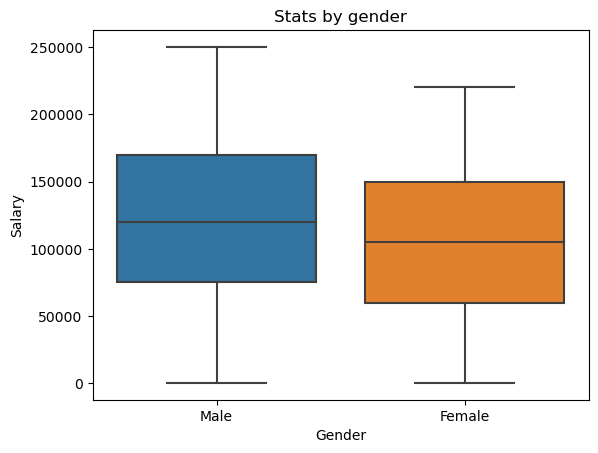

In [6]:
# create a unique dataset without gender Other 
df_without_other_gender = eda[eda['Gender'] != 'Other']

# create a "box with mustache" diagram"
sns.boxplot(data=df_without_other_gender, x='Gender', y='Salary')
plt.title('Stats by gender');

Salaries for males are higher on average,also for minimum and maximum values

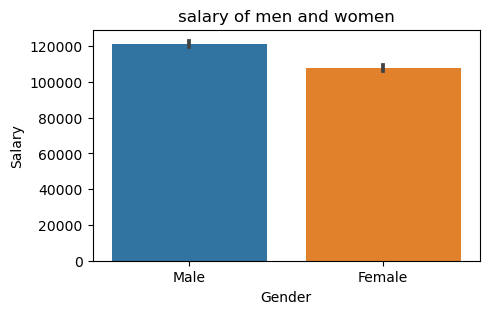

In [7]:
fig1,ax1=plt.subplots(figsize=(5,3))
sns.barplot(df_without_other_gender,x="Gender",y="Salary",ax=ax1)
ax1.set_title("salary of men and women");

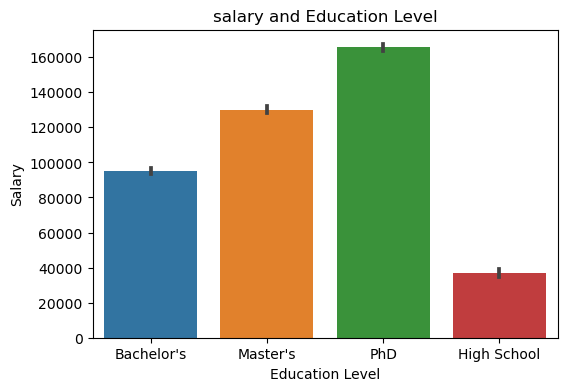

In [8]:
fig2,ax2=plt.subplots(figsize=(6,4))
sns.barplot(eda,x="Education Level",y="Salary",ax=ax2)
ax2.set_title("salary and Education Level")
plt.xticks(rotation=0);

The visualization provides a clear illustration of the relationship between education level and salary. As education level increases, there is a noticeable upward trend in salary.

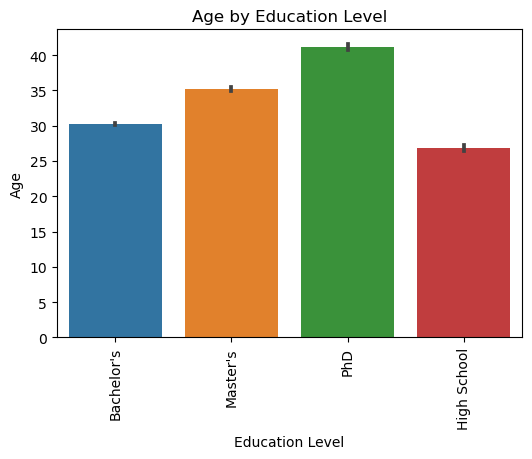

In [9]:
fig3,ax3=plt.subplots(figsize=(6,4))
sns.barplot(eda,x="Education Level",y="Age",ax=ax3)
ax3.set_title("Age by Education Level")
plt.xticks(rotation=90);

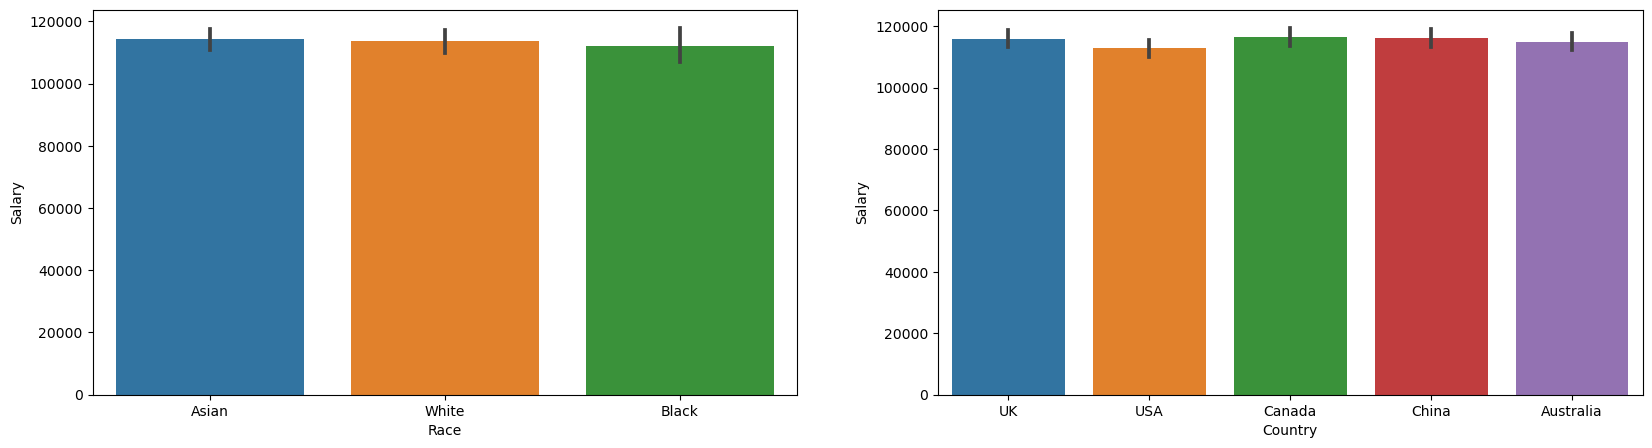

In [10]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.barplot(eda,x="Race",y="Salary");

plt.subplot(122)
sns.barplot(eda,x="Country",y="Salary");


The visualization suggests that there is no evident discrimination in salary based on country and race.

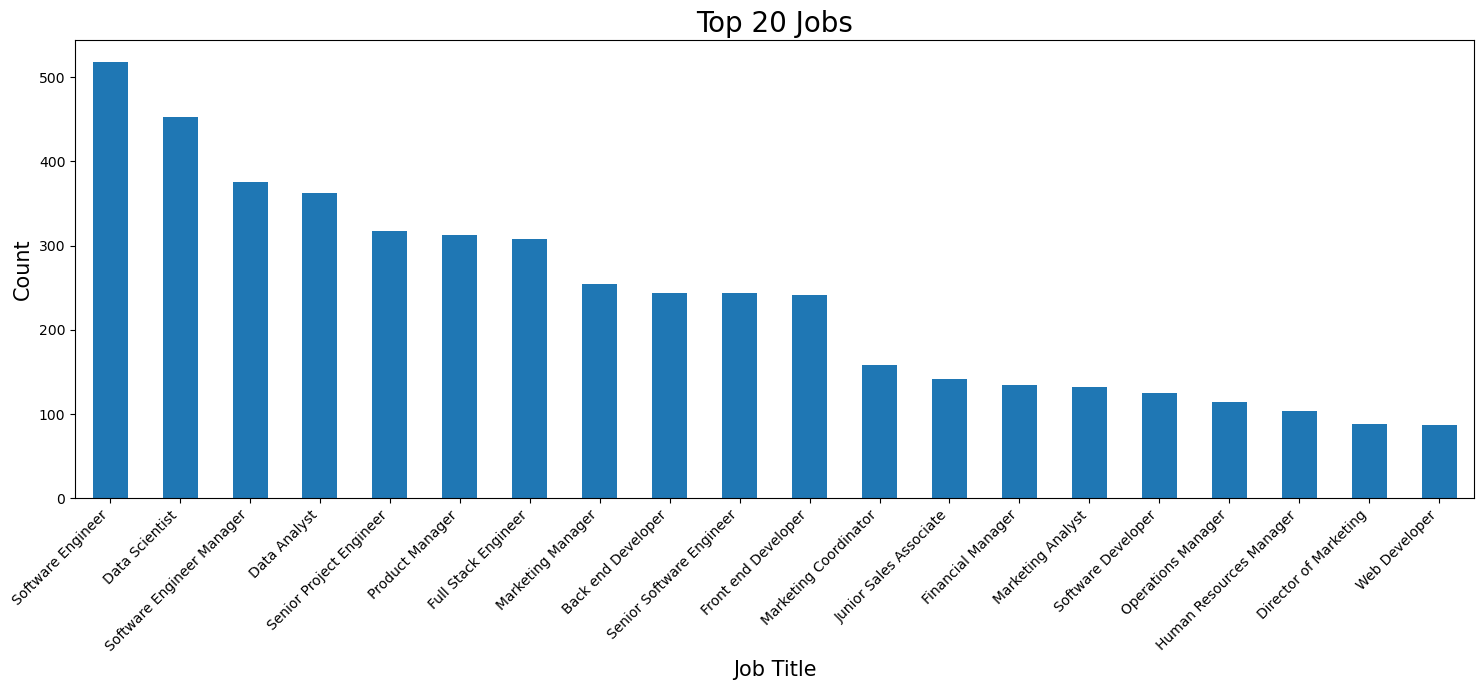

In [11]:
top_jobs = eda['Job Title'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(15, 7))
top_jobs.plot(kind='bar', ax=ax)
ax.set_title("Top 20 Jobs", fontsize=20)
ax.set_xlabel("Job Title",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

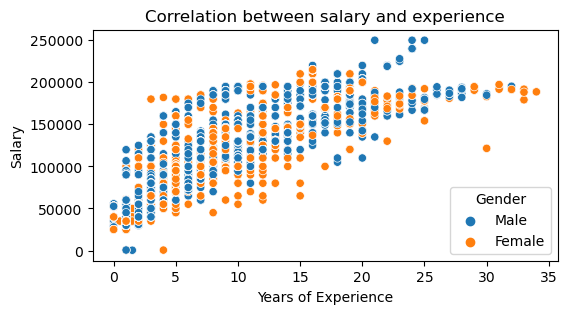

In [26]:
fig4, ax4 = plt.subplots(figsize=(6,3))
sns.scatterplot(data=df_without_other_gender, x='Years of Experience', y='Salary',hue='Gender', ax=ax4)
ax4.set_title("Correlation between salary and experience")
plt.show()

## Data Preprocessing

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [14]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender', 'Country', 'Education Level', 'Job Title', 'Race']
le = LabelEncoder()

for col in categorical_columns:
    eda[col] = le.fit_transform(eda[col])
    unique_values = eda[col].unique()
    print(f"Encoded values for {col}: {unique_values}")

Encoded values for Gender: [1 0 2]
Encoded values for Country: [3 4 1 2 0]
Encoded values for Education Level: [0 2 3 1]
Encoded values for Job Title: [175  18 144 115  25  93 106 118  94 165 174  47  40 109  14 102  96 130
  19 116   4 189  53 112  41 173 177  66 126 105   7   1  20  97 184  46
 108  17 117 186 101  98   2 179  11   0  33  48  13   6  38 188  45 187
 172  34 129  56  23  52  15   5 132 190 113 183  12 168  50  10 182 120
   9  65  39  55 159 104 181 148 185 114  86 110 100 107 136  90 157   8
  22  54 145  16 134 178 180 124  71  99 103  70 155  75 135 119 167  89
 169 161  83  73  63 156  58 163  74  79 123  36  80 125 153  62 143  68
 152  32  87 164  35  61 146 139  59 122 162  69  29  72  64 150 138 170
  78 149 142 160  37 121  26  84 140 127  31  57  88 147 141 131  60  85
 154  77 166  81 133 137 128  76  30 151  67  28 176   3 158  44  43  42
  27  49  82  51  92  91  24 111  95 171  21]
Encoded values for Race: [3 0 2 1]


In [15]:
# creating train test data sets
from sklearn.model_selection import train_test_split
x = eda.drop(['Salary'], axis=1)
y = eda['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

 ## Applying models

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Linear Regression

In [17]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression R-squared:", lr_r2)

Linear Regression R-squared: 0.6697239304692015


## Random Forest Regression

In [18]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest R-squared:", rf_r2)

Random Forest R-squared: 0.971120741076718
